In [84]:
import numpy as np

In [85]:
import pandas as pd

In [86]:
data = pd.read_csv("Stock_csvs\TATASTEEL.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [87]:
import matplotlib.pyplot as plt

In [88]:
data.shape

(5306, 15)

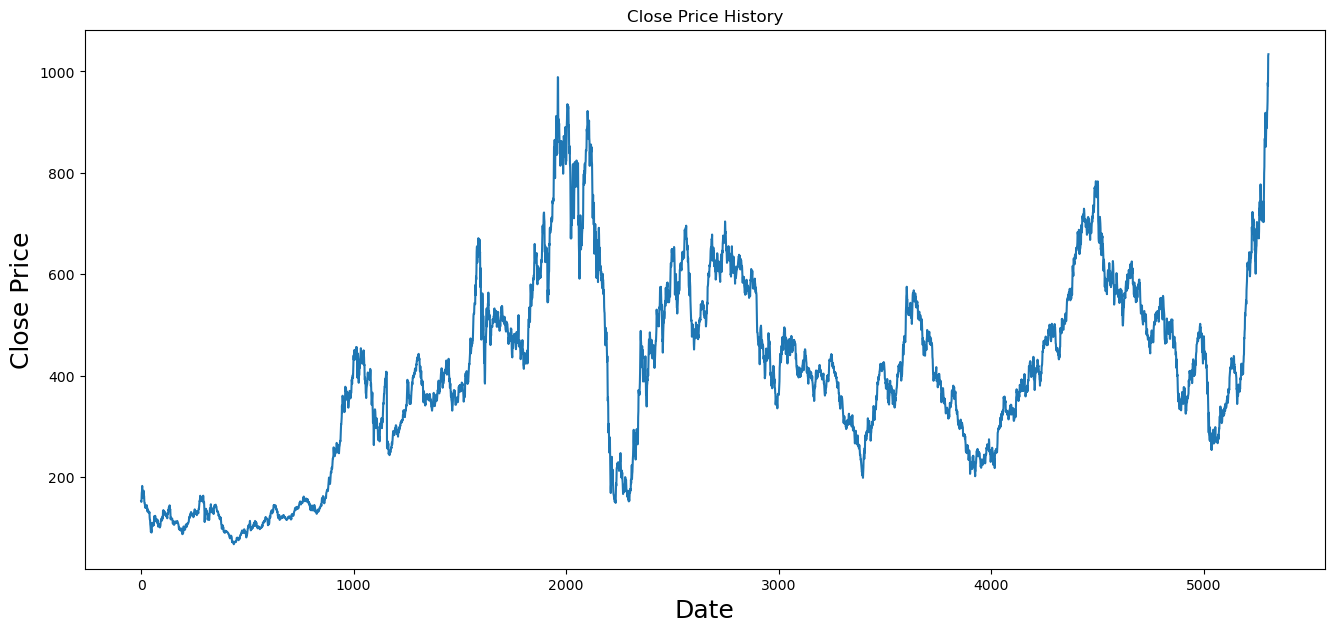

In [89]:
plt.figure(figsize=(16,7))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
data.shape

(5306, 15)

In [93]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [94]:
x = data.drop(["Date","High","Symbol","Series","Trades","Deliverable Volume","%Deliverble"],axis = 1)

In [95]:
x.head()

,Prev Close,Open,Low,Last,Close,VWAP,Volume,Turnover
0,142.35,148.00,146.10,152.50,152.45,150.92,2003185,3.023164e+13
1,152.45,150.10,143.05,151.95,150.80,151.03,1555136,2.348785e+13
2,150.80,144.60,144.60,158.00,156.55,156.85,3840284,6.023364e+13
3,156.55,158.95,158.95,169.00,168.25,167.61,2560449,4.291530e+13
4,168.25,173.40,166.30,170.55,171.95,173.89,3641691,6.332459e+13


In [96]:
y = data['Close']

In [97]:
y

0        152.45
1        150.80
2        156.55
3        168.25
4        171.95
         ...   
5301     940.75
5302     977.75
5303     971.40
5304    1031.35
5305    1034.00
Name: Close, Length: 5306, dtype: float64

In [98]:
x_scaled = scaler.fit_transform(x)

In [99]:
x_scaled

array([[-1.39495233, -1.36637764, -1.36209558, ..., -1.35068042,
        -0.78108362, -0.7842322 ],
       [-1.34097879, -1.35518016, -1.37868599, ..., -1.3500935 ,
        -0.86516771, -0.80661765],
       [-1.34979625, -1.38450688, -1.3702548 , ..., -1.31904006,
        -0.43632043, -0.68464306],
       ...,
       [ 3.06935414,  3.09661593,  3.07597537, ...,  3.03073551,
         2.68039677,  5.71342302],
       [ 3.03542028,  3.08595167,  3.19020443, ...,  3.26379636,
         7.23520662, 14.19340094],
       [ 3.35578797,  3.30456903,  3.34305379, ...,  3.35018041,
         4.12201287,  8.75119869]])

# PCA

In [100]:
from sklearn.decomposition import PCA

In [101]:
# PCA will select the fewest principal components that collectively explain 95% or more of the variance in the dataset
pca = PCA(0.95)

In [102]:
x_scaled.shape

(5306, 8)

In [103]:
x_pca = pca.fit_transform(x_scaled)

In [104]:
x_pca.shape

(5306, 2)

In [105]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [106]:
x_train = x_pca[0:int(len(x_pca)*0.80)]
x_test = x_pca[int(len(x_pca)*0.80) : int(len(x_pca))]
y_train = y[0:int(len(y)*0.80)]
y_test = y[int(len(y)*0.80) : int(len(y))]

In [107]:
x_train.shape

(4244, 2)

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [109]:
regressor.score(x_test,y_test)*100

99.67354571594326

In [110]:
from sklearn.metrics import accuracy_score,r2_score
print("Accuracy_Linear Regression = ",r2_score(y_test,regressor.predict(x_test))*100)

Accuracy_Linear Regression =  99.67354571594326


In [111]:
x_train

array([[-3.48627522, -0.32636356],
       [-3.48569676, -0.40596419],
       [-3.38590608, -0.01882265],
       ...,
       [ 0.25285424, -0.31485188],
       [ 0.7704142 ,  1.13176533],
       [ 0.53315305, -0.29913628]])

In [112]:
x_train_df = pd.DataFrame(x_train)

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state = 89)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=89)

In [115]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_test,rf.predict(x_test))*100

93.44948793234153

# SVM

In [224]:
from sklearn.svm import SVR
svr = SVR(gamma = 0.1,C = 1000)

In [225]:
svr.fit(x_train,y_train)

SVR(C=1000, gamma=0.1)

In [226]:
predicted = svr.predict(x_test)

In [227]:
predicted.shape

(1062,)

In [228]:
dfr = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [229]:
dfr.head(8)

,Actual,Predicted
4244,446.35,446.768776
4245,458.45,453.034984
4246,454.25,455.506045
4247,468.35,463.493912
4248,467.15,466.764606
4249,454.50,460.205257
4250,461.80,457.392467
4251,464.25,462.600849


In [230]:
graph = dfr.head(20)

<Axes: >

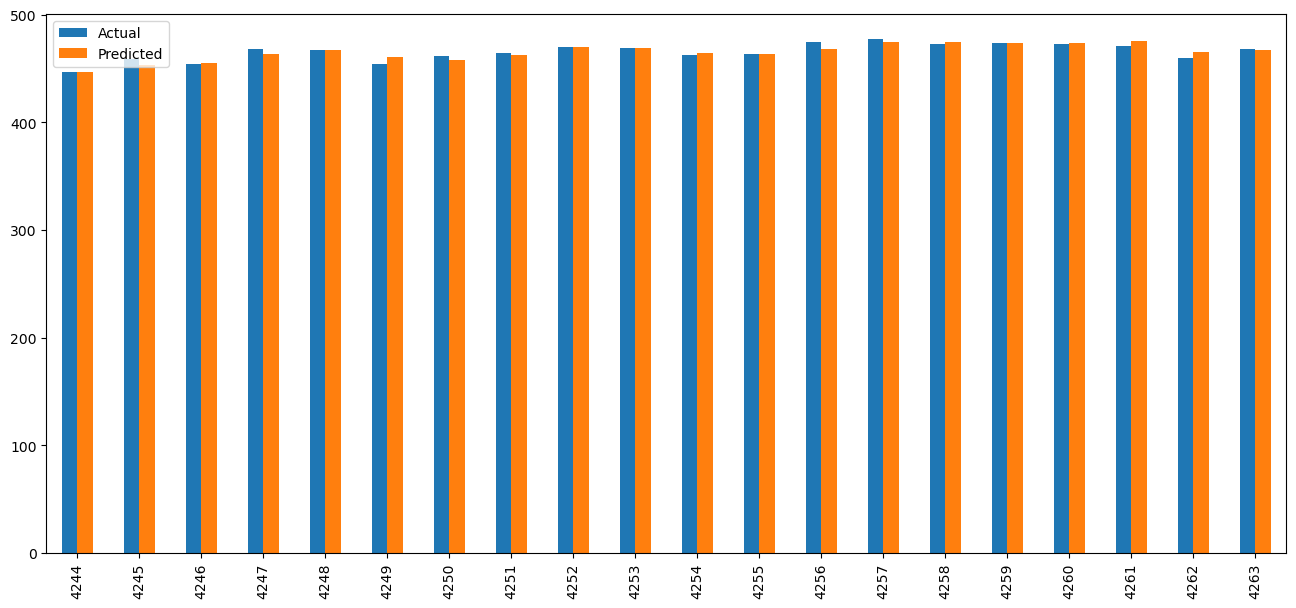

In [231]:
graph.plot(kind = 'bar', figsize = (16,7))

<Axes: ylabel='Density'>

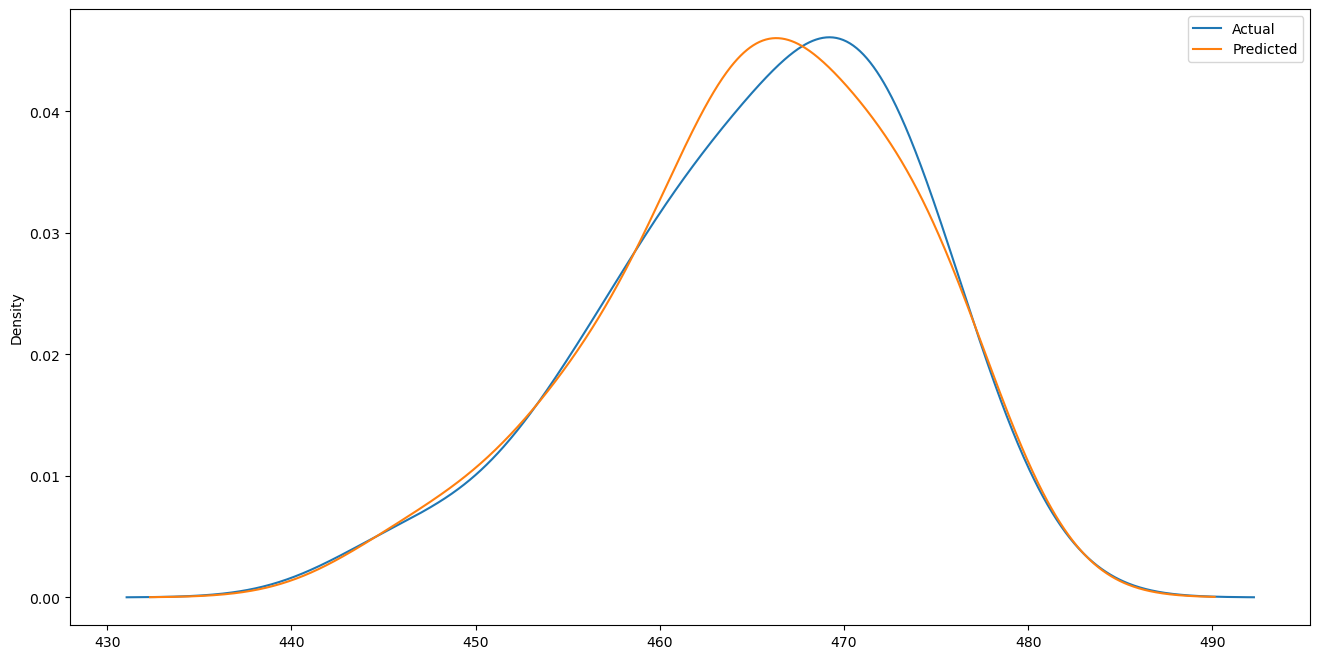

In [232]:
graph.plot(kind = 'kde', figsize = (16,8))

In [233]:
print("Accuracy_SVM = ",r2_score(y_test,predicted)*100)

Accuracy_SVM =  78.95818053376715
